In [1]:
import os

import pandas

%matplotlib widget
import matplotlib
import matplotlib.pyplot

import seaborn
import scipy.stats

import math

import datetime
import pytz

In [2]:
root_path = '/Users/matthieu/.ssh/ssh_to_graz/saved_graz_data/beetle/'

data_path = root_path + '1feeder/'
conf_path = root_path + 'config/'

data_file = data_path + '1feeder_exp_result.csv'

In [3]:
# From google sheets spreadsheet
data = pandas.read_csv(data_file)

datetime_objects    = []
starttime_objects   = []
stoptime_objects    = []

for ind, dat in data.iterrows():
    
    dt_str              = dat.Date
    time_ratio_start    = float(dat.Start.replace(',','.'))
    time_ratio_stop     = float(dat.Stop.replace(',','.'))

    start_hour  = math.floor(time_ratio_start*24)
    stop_hour   = math.floor(time_ratio_stop*24)
    start_min   = round((time_ratio_start*24 - start_hour)*60)
    stop_min    = round((time_ratio_stop*24 - stop_hour)*60)
    start_sec   = 0
    stop_sec    = 0
    start_str   = 'T'+str(start_hour)+':'+str(start_min)+':'+str(start_sec)
    stop_str    = 'T'+str(stop_hour)+':'+str(stop_min)+':'+str(stop_sec)

    datetime_objects.append(pytz.utc.localize(datetime.datetime.strptime(dt_str, "%d.%m.%y")))
    starttime_objects.append(pytz.utc.localize(datetime.datetime.strptime(dt_str+start_str, "%d.%m.%yT%H:%M:%S")))
    stoptime_objects.append(pytz.utc.localize(datetime.datetime.strptime(dt_str+stop_str, "%d.%m.%yT%H:%M:%S")))

data['dt'] = datetime_objects
data['dtts_start'] = starttime_objects
data['dtts_stop'] = stoptime_objects
data['duration']=data.dtts_stop - data.dtts_start
data
# data={}
# data['exp_id'] = range(1,29)
# data['recruits'] = [6,14,9,6,0,2,2,0,1,8,0,15,8,7,22,1,14,1,1,0,1,0,1,0,0,0,8,0]
# data['type'] = [1,0,0,0,1,1,0,0,1,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1]
# data = pandas.DataFrame.from_dict(data)

,Exp nb,Date,Start,Stop,visits,recruits,type,dt,dtts_start,dtts_stop,duration
0,1,18.07.23,"0,3819444444","0,4618055556",110,6,1,2023-07-18 00:00:00+00:00,2023-07-18 09:10:00+00:00,2023-07-18 11:05:00+00:00,0 days 01:55:00
1,2,18.07.23,"0,4861111111","0,5659722222",96,14,0,2023-07-18 00:00:00+00:00,2023-07-18 11:40:00+00:00,2023-07-18 13:35:00+00:00,0 days 01:55:00
2,3,19.07.23,"0,4166666667","0,4965277778",219,9,0,2023-07-19 00:00:00+00:00,2023-07-19 10:00:00+00:00,2023-07-19 11:55:00+00:00,0 days 01:55:00
3,4,19.07.23,"0,5069444444","0,5868055556",95,6,0,2023-07-19 00:00:00+00:00,2023-07-19 12:10:00+00:00,2023-07-19 14:05:00+00:00,0 days 01:55:00
4,5,19.07.23,"0,5972222222","0,6770833333",164,0,1,2023-07-19 00:00:00+00:00,2023-07-19 14:20:00+00:00,2023-07-19 16:15:00+00:00,0 days 01:55:00
5,6,20.07.23,"0,3819444444","0,4618055556",180,2,1,2023-07-20 00:00:00+00:00,2023-07-20 09:10:00+00:00,2023-07-20 11:05:00+00:00,0 days 01:55:00
6,7,20.07.23,"0,4722222222","0,5520833333",100,2,0,2023-07-20 00:00:00+00:00,2023-07-20 11:20:00+00:00,2023-07-20 13:15:00+00:00,0 days 01:55:00
7,8,20.07.23,"0,5972222222","0,6770833333",68,0,0,2023-07-20 00:00:00+00:00,2023-07-20 14:20:00+00:00,2023-07-20 16:15:00+00:00,0 days 01:55:00
8,9,21.07.23,"0,3888888889","0,46875",70,1,1,2023-07-21 00:00:00+00:00,2023-07-21 09:20:00+00:00,2023-07-21 11:15:00+00:00,0 days 01:55:00
9,10,21.07.23,"0,5104166667","0,5902777778",72,8,1,2023-07-21 00:00:00+00:00,2023-07-21 12:15:00+00:00,2023-07-21 14:10:00+00:00,0 days 01:55:00


In [12]:
days_to_discard_str = ['23/07/22', '23/07/25', '23/07/26']#, '23/07/27']
# 20 ? # '23/07/20', 
# 24 apparently warm. Feeder moved during the previous night (problematic position?)
# 25 particularly cold
# 26 kinda cold
days_to_discard = [pytz.utc.localize(datetime.datetime.strptime(x, '%y/%m/%d')) for x in days_to_discard_str]

data_cleaned = data
for d in days_to_discard:
    data_cleaned = data_cleaned[data_cleaned.dt != d]

data_cleaned

,Exp nb,Date,Start,Stop,visits,recruits,type,dt,dtts_start,dtts_stop,duration
0,1,18.07.23,"0,3819444444","0,4618055556",110,6,1,2023-07-18 00:00:00+00:00,2023-07-18 09:10:00+00:00,2023-07-18 11:05:00+00:00,0 days 01:55:00
1,2,18.07.23,"0,4861111111","0,5659722222",96,14,0,2023-07-18 00:00:00+00:00,2023-07-18 11:40:00+00:00,2023-07-18 13:35:00+00:00,0 days 01:55:00
2,3,19.07.23,"0,4166666667","0,4965277778",219,9,0,2023-07-19 00:00:00+00:00,2023-07-19 10:00:00+00:00,2023-07-19 11:55:00+00:00,0 days 01:55:00
3,4,19.07.23,"0,5069444444","0,5868055556",95,6,0,2023-07-19 00:00:00+00:00,2023-07-19 12:10:00+00:00,2023-07-19 14:05:00+00:00,0 days 01:55:00
4,5,19.07.23,"0,5972222222","0,6770833333",164,0,1,2023-07-19 00:00:00+00:00,2023-07-19 14:20:00+00:00,2023-07-19 16:15:00+00:00,0 days 01:55:00
5,6,20.07.23,"0,3819444444","0,4618055556",180,2,1,2023-07-20 00:00:00+00:00,2023-07-20 09:10:00+00:00,2023-07-20 11:05:00+00:00,0 days 01:55:00
6,7,20.07.23,"0,4722222222","0,5520833333",100,2,0,2023-07-20 00:00:00+00:00,2023-07-20 11:20:00+00:00,2023-07-20 13:15:00+00:00,0 days 01:55:00
7,8,20.07.23,"0,5972222222","0,6770833333",68,0,0,2023-07-20 00:00:00+00:00,2023-07-20 14:20:00+00:00,2023-07-20 16:15:00+00:00,0 days 01:55:00
8,9,21.07.23,"0,3888888889","0,46875",70,1,1,2023-07-21 00:00:00+00:00,2023-07-21 09:20:00+00:00,2023-07-21 11:15:00+00:00,0 days 01:55:00
9,10,21.07.23,"0,5104166667","0,5902777778",72,8,1,2023-07-21 00:00:00+00:00,2023-07-21 12:15:00+00:00,2023-07-21 14:10:00+00:00,0 days 01:55:00


Ranksums test for all data : RanksumsResult(statistic=-0.6679474875720741, pvalue=0.5041671132207985)
Ranksums test for cleaned data : RanksumsResult(statistic=-1.776433023143368, pvalue=0.07566157214388704)


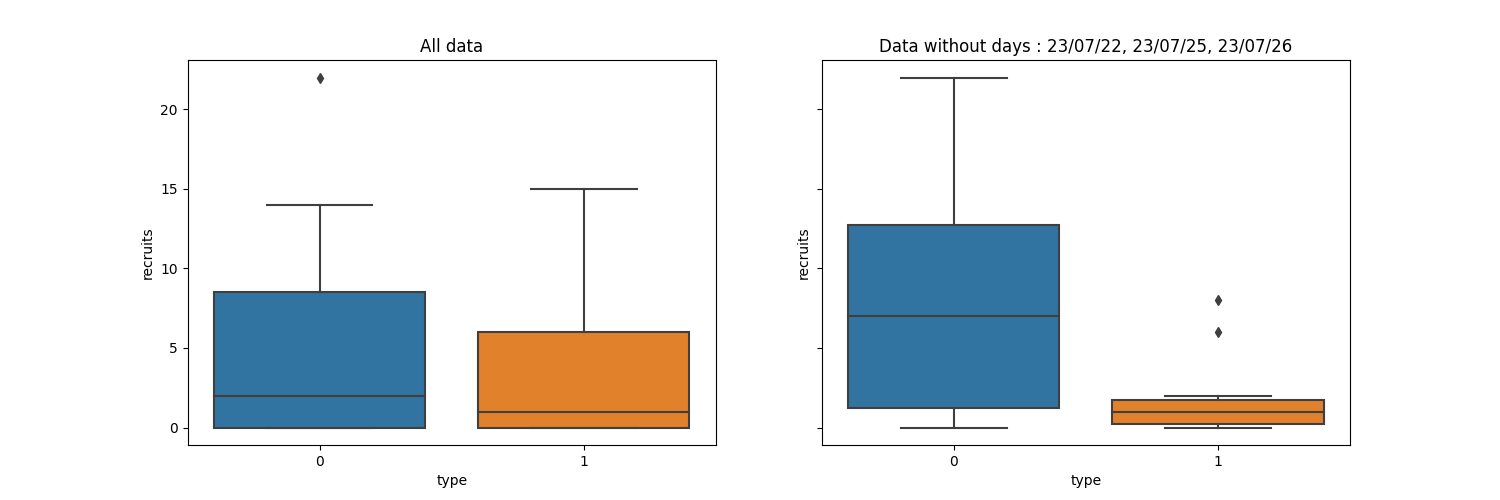

In [13]:
fig, ax = matplotlib.pyplot.subplots(1, 2, figsize=(15,5), sharey=True)
ax[0].set_title('All data')
# _ =matplotlib.pyplot.boxplot([data[data.type == 1].recruits, data[data.type == 0].recruits])
seaborn.boxplot(data=data, y='recruits', x='type', ax=ax[0])
# seaborn.relplot(data=data, x='type', y='recruits', kind='scatter', alpha=0.3)

# matplotlib.pyplot.figure(figsize=(8, 5))
ax[1].set_title('Data without days : ' + ', '.join(days_to_discard_str))
# _ =matplotlib.pyplot.boxplot([data[data.type == 1].recruits, data[data.type == 0].recruits])
seaborn.boxplot(data=data_cleaned, y='recruits', x='type', ax=ax[1])
# seaborn.relplot(data=data, x='type', y='recruits', kind='scatter', alpha=0.3)

# Wilcoxon rank-sum
print('Ranksums test for all data : {}'.format(scipy.stats.ranksums(data[data.type == 1].recruits, data[data.type == 0].recruits)))
print('Ranksums test for cleaned data : {}'.format(scipy.stats.ranksums(data_cleaned[data_cleaned.type == 1].recruits, data_cleaned[data_cleaned.type == 0].recruits)))